In [1]:
from matplotlib import pyplot as plt
import pandas
import seaborn as sns

%matplotlib inline

FIG_WIDTH=15
FIG_HEIGTH=8

def setup_fig():
    fig, _ = plt.subplots()
    fig.set_figwidth(FIG_WIDTH)
    fig.set_figheight(FIG_HEIGTH)
    fig.patch.set_alpha(1.0)
    return fig

# Latency tests

## Debian Xorg + GNOME tests

Those tests were run in my regular workstation, using GNOME + Xorg

|                |   count |    mean |      std |   min |     25% |    50% |     75% |   max |
|:---------------|--------:|--------:|---------:|------:|--------:|-------:|--------:|------:|
| mlterm         |     200 | 28.8349 | 6.23246  | 15.16 | 31.235  | 31.665 | 32.0425 | 32.65 |
| uxterm         |     200 | 29.8086 | 5.01335  | 15.39 | 31.25   | 31.525 | 31.9025 | 32.5  |
| konsole        |     199 | 31.7569 | 1.20074  | 16.22 | 31.52   | 31.8   | 32.12   | 35.07 |
| alacritty      |     200 | 31.7943 | 0.560434 | 27.24 | 31.45   | 31.82  | 32.1625 | 33.11 |
| st             |     200 | 33.5791 | 5.03363  | 30.66 | 31.64   | 31.975 | 32.3225 | 49.33 |
| urxvt          |     200 | 47.4618 | 4.18906  | 31.81 | 48.245  | 48.58  | 49.0025 | 49.7  |
| pterm          |     200 | 48.2193 | 2.63108  | 31.24 | 48.23   | 48.595 | 48.96   | 49.76 |
| gnome-terminal |     200 | 48.303  | 2.40031  | 32.18 | 48.2675 | 48.635 | 48.9525 | 55.12 |
| xfce4-terminal |     200 | 48.3829 | 2.00524  | 

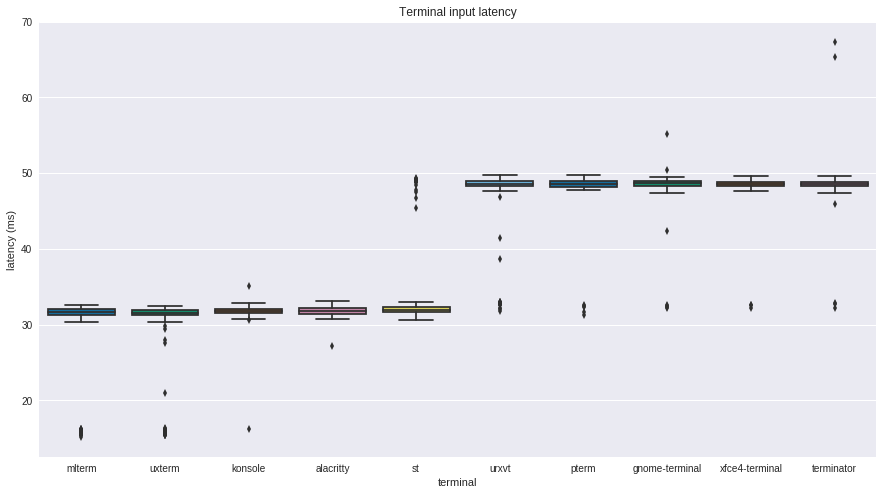

In [2]:
fig = setup_fig()

latency = pandas.read_csv('latency/debian9-xorg.csv')
# remove weird outlier in konsole
latency = latency.apply(lambda x: x[(x<100)], axis=0)
latency = latency.reindex_axis(latency.mean().sort_values().index, axis=1)
ax = sns.boxplot(data=latency, palette='colorblind')
ax.set_title('Terminal input latency')
ax.set_xlabel('terminal')
ax.set_ylabel('latency (ms)')

from tabulate import tabulate
print(tabulate(latency.describe().transpose(), headers='keys', tablefmt='pipe'))


## Debian Xorg + i3

Those were run using a simpler session using the i3 window manager.

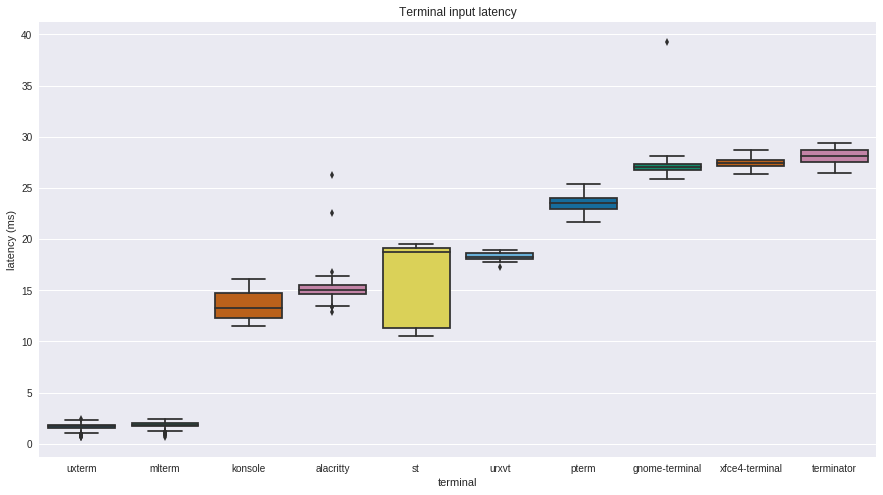

In [3]:
fig = setup_fig()

latency = pandas.read_csv('latency/debian9-xorg-i3.csv')
latency.drop(["urxvt-xft-monospace", "urxvt-fixed-16", "urxvt-fixed-16-float"], axis=1, inplace=True)

latency = latency.reindex_axis(latency.mean().sort_values().index, axis=1)

ax = sns.boxplot(data=latency, palette='colorblind')
ax.set_title('Terminal input latency')
ax.set_xlabel('terminal')
ax.set_ylabel('latency (ms)')


## Raw data for editors + Debian / i3

|                |   count |   mean |   std |   min |   50% |   90% |   max |
|:---------------|--------:|-------:|------:|------:|------:|------:|------:|
| uxterm         |     200 |    1.7 |   0.3 |   0.7 |   1.7 |   2   |   2.4 |
| mlterm         |     200 |    1.8 |   0.3 |   0.7 |   1.9 |   2.2 |   2.5 |
| vim.athena     |     200 |    2.8 |   1.1 |   0.4 |   2.9 |   3.5 |  12.7 |
| vim.gtk        |     200 |    3.9 |   1.2 |   0.7 |   4.2 |   4.8 |  11.9 |
| emacs -q       |     200 |    4.8 |   2.3 |   0.5 |   4.9 |   5.8 |  32.5 |
| gedit          |     200 |    8.9 |   3.4 |   2.8 |   9.8 |  12.5 |  14.2 |
| konsole        |     200 |   13.4 |   1.2 |  11.5 |  13.3 |  15   |  16.1 |
| alacritty      |     200 |   15.1 |   1.2 |  12.8 |  15.1 |  15.9 |  26.3 |
| st             |     200 |   15.7 |   3.9 |  10.6 |  18.8 |  19.4 |  19.6 |
| vim.gtk3       |     200 |   16.5 |   7.9 |   0.4 |  20.6 |  21.9 |  27.2 |
| urxvt          |     200 |   18.3 |   0.3 |  17.3 |  18.3 |  1

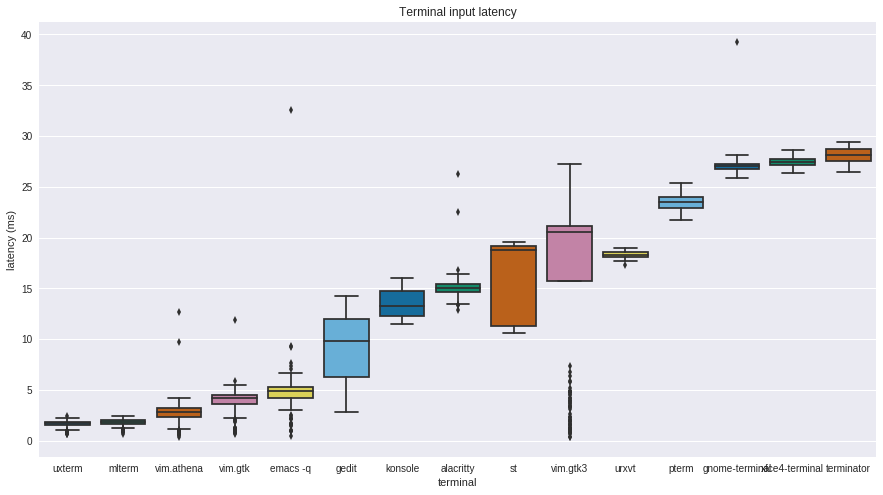

In [4]:
latency = pandas.concat([latency, pandas.read_csv('editors.csv')])

latency.drop("emacs", axis=1, inplace=True)
latency = latency.reindex_axis(latency.mean().sort_values().index, axis=1)

from tabulate import tabulate
print(tabulate(latency.describe(percentiles=[0.9]).round(1).transpose(), headers='keys', tablefmt='pipe'))

fig = setup_fig()

ax = sns.boxplot(data=latency, palette='colorblind')
ax.set_title('Terminal input latency')
ax.set_xlabel('terminal')
ax.set_ylabel('latency (ms)')


## Fedora GNOME + Xorg

Those tests were ran on Fedora 27 with the default GNOME + Xorg session. The tests crash completely in Wayland.

|                |   count |    mean |     std |   min |     25% |    50% |     75% |   max |
|:---------------|--------:|--------:|--------:|------:|--------:|-------:|--------:|------:|
| mlterm         |     200 | 16.732  | 6.52684 |  8.2  | 12.66   | 13.36  | 17.6    | 30.9  |
| uxterm         |     200 | 28.9527 | 3.73927 | 11.93 | 28.3675 | 29.49  | 30.63   | 37.59 |
| konsole        |     200 | 29.8188 | 2.14301 | 21.95 | 28.5575 | 29.75  | 30.725  | 41.72 |
| st             |     200 | 30.4384 | 3.81713 | 21.99 | 28.345  | 29.875 | 31.7525 | 46.11 |
| pterm          |     200 | 42.1507 | 5.62529 | 29.58 | 34.2225 | 44.835 | 46.08   | 48.09 |
| urxvt          |     200 | 43.8995 | 4.9363  | 29.68 | 44.205  | 45.59  | 46.7625 | 50.7  |
| terminology    |     200 | 44.3843 | 4.80309 | 29.76 | 44.6625 | 46     | 46.8125 | 57.95 |
| gnome-terminal |     200 | 45.9754 | 1.94185 | 35.14 | 45.505  | 46.345 | 46.8225 | 53.88 |
| xfce4-terminal |     200 | 46.1249 | 1.85098 | 35.16 | 45.

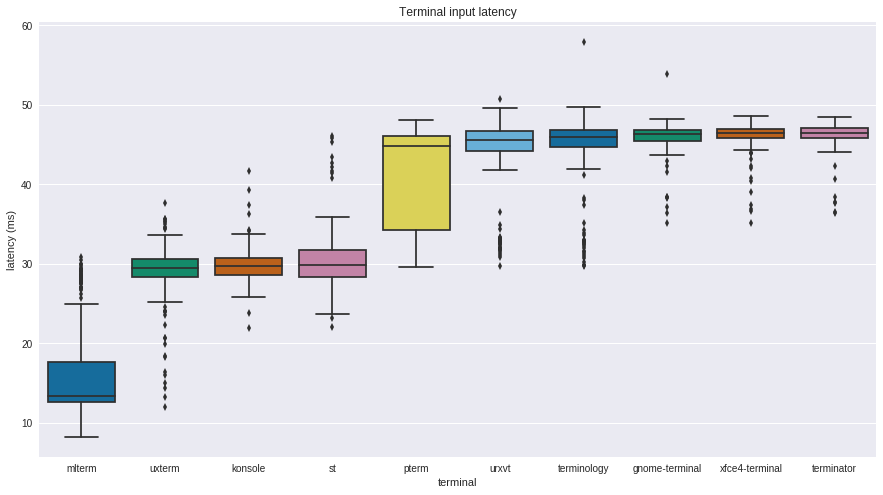

In [5]:
fig = setup_fig()

latency = pandas.read_csv('latency/fedora27-xorg.csv')
latency = latency.reindex_axis(latency.mean().sort_values().index, axis=1)

ax = sns.boxplot(data=latency, palette='colorblind')
ax.set_title('Terminal input latency')
ax.set_xlabel('terminal')
ax.set_ylabel('latency (ms)')

print(tabulate(latency.describe().transpose(), headers='keys', tablefmt='pipe'))


# Resource tests

In [6]:
deb9_xorg = pandas.read_csv('debian9-xorg-prime-100x100000.csv').assign(env='Debian 9, Xorg')
f27_xorg = pandas.read_csv('fedora27-xorg-prime-100x100000.csv').assign(env='Fedora 27, Xorg')
f27_wayland = pandas.read_csv('fedora27-wayland-prime-100x100000.csv').assign(env='Fedora 27, Wayland')

data = pandas.concat([deb9_xorg, f27_xorg, f27_wayland])

# rename debian name to more standard name also used in fedora
data['terminal'].replace(['stterm'], 'st',inplace=True)

# massage I/O data into a separate field
data['blocks'] = data['ru_inblock'] + data['ru_oublock']

# https://lkml.org/lkml/2007/3/19/84
# "block size" is apparently hardcoded to 512 bytes
data['out_bytes'] = data['ru_oublock'] * 512

## Raw data

In [7]:
from tabulate import tabulate

#print(tabulate(latency.describe().transpose(), headers='keys', tablefmt='pipe'))
#print(tabulate(data.groupby('terminal').describe(), headers='keys', tablefmt='pipe'))
desc = data.drop(['n', 'blocks', 'count', 'index', 'env', 'ru_idrss', 'ru_inblock', 'ru_isrss', 'ru_ixrss', 'ru_majflt', 'ru_minflt', 'ru_msgrcv', 'ru_msgsnd', 'ru_nivcsw', 'ru_nsignals', 'ru_nswap', 'ru_nvcsw', 'ru_oublock'], axis=1)
table = desc.groupby('terminal').describe(percentiles=[0.9]).round(2)

#for col in table:
#    print("row: %r" % (table[col]))
print(tabulate(table, headers='keys', tablefmt='pipe'))
pandas.options.display.max_rows = 2000
table
# that table is still not quite right, we'd need to reshuffle things around
# this is my first try:
#temp = table.reset_index()
#newdf = temp.pivot(index='terminal',columns='ru_maxrss')
#newdf.columns.name = ''
#newdf
#
# but it doesn't work. it's inspired by:
# https://stackoverflow.com/questions/32835498/pandas-python-describe-formatting-output#32835655

|                             |        out_bytes |   ru_maxrss |   ru_stime |   ru_utime |   wtime |
|:----------------------------|-----------------:|------------:|-----------:|-----------:|--------:|
| ('alacritty', 'count')      |    100           |      100    |     100    |     100    |  100    |
| ('alacritty', 'mean')       |      0           |    29032.9  |       0.32 |       0.46 |    0.51 |
| ('alacritty', 'std')        |      0           |      138.18 |       0.02 |       0.03 |    0.01 |
| ('alacritty', 'min')        |      0           |    28688    |       0.27 |       0.39 |    0.5  |
| ('alacritty', '50%')        |      0           |    29072    |       0.32 |       0.46 |    0.51 |
| ('alacritty', '90%')        |      0           |    29157.2  |       0.36 |       0.49 |    0.51 |
| ('alacritty', 'max')        |      0           |    29276    |       0.4  |       0.52 |    0.53 |
| ('konsole', 'count')        |    300           |      300    |     300    |     300    | 

                       out_bytes  ru_maxrss  ru_stime  ru_utime   wtime
terminal                                                               
alacritty      count      100.00     100.00    100.00    100.00  100.00
               mean         0.00   29032.92      0.32      0.46    0.51
               std          0.00     138.18      0.02      0.03    0.01
               min          0.00   28688.00      0.27      0.39    0.50
               50%          0.00   29072.00      0.32      0.46    0.51
               90%          0.00   29157.20      0.36      0.49    0.51
               max          0.00   29276.00      0.40      0.52    0.53
konsole        count      300.00     300.00    300.00    300.00  300.00
               mean     84855.47   67052.12      0.25      0.79    0.80
               std     111979.56    2397.00      0.03      0.06    0.10
               min       8192.00   62804.00      0.16      0.64    0.63
               50%      81920.00   68462.00      0.26      0.81 

## Processing time (wall time)

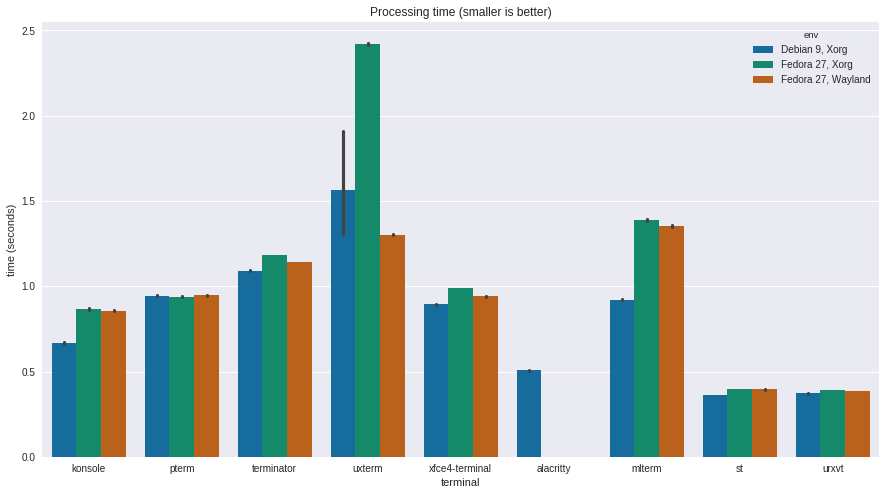

In [8]:
# not reviewed in the article
data = data[data.terminal != 'terminology']

fig = setup_fig()

ax = sns.barplot(data=data, x='terminal', y='wtime', palette='colorblind', hue='env')
ax.set_title('Processing time (smaller is better)')
ax.set_ylabel('time (seconds)')

## system time

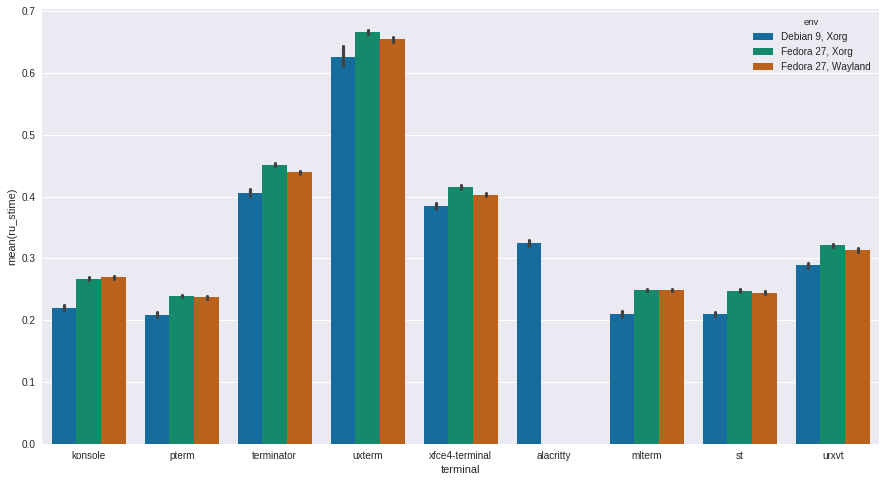

In [9]:
fig = setup_fig()

ax = sns.barplot(data=data, x='terminal', y='ru_stime', palette='colorblind', hue='env')

## user time

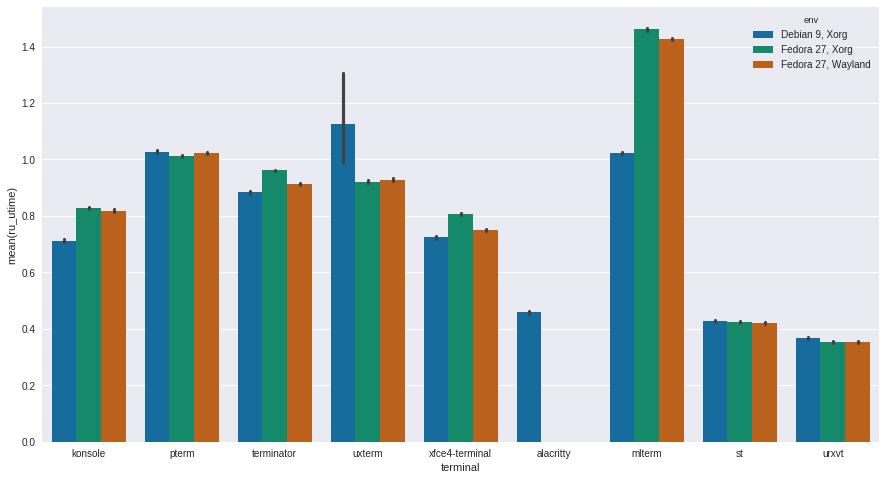

In [10]:
fig = setup_fig()

ax = sns.barplot(data=data, x='terminal', y='ru_utime', palette='colorblind', hue='env')

## Memory usage

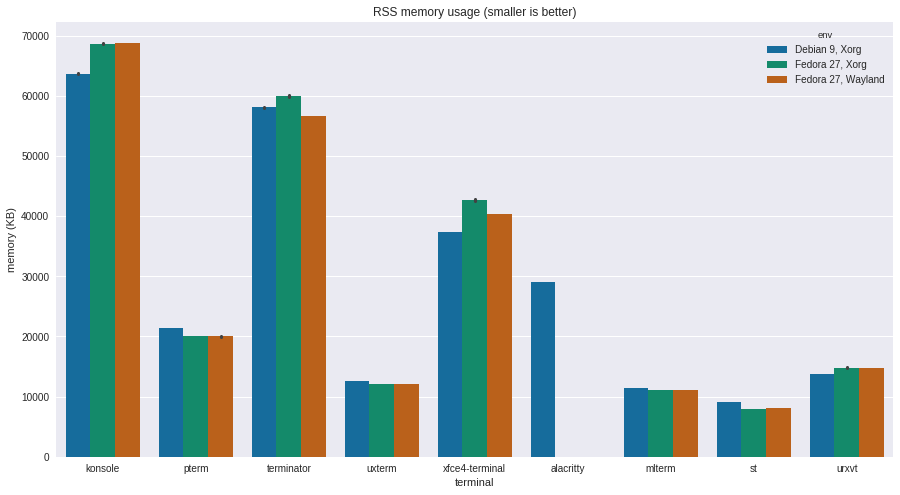

In [11]:
fig = setup_fig()

ax = sns.barplot(data=data, x='terminal', y='ru_maxrss', palette='colorblind', hue='env')
ax.set_title('RSS memory usage (smaller is better)')
ax.set_ylabel('memory (KB)')


## I/O usage

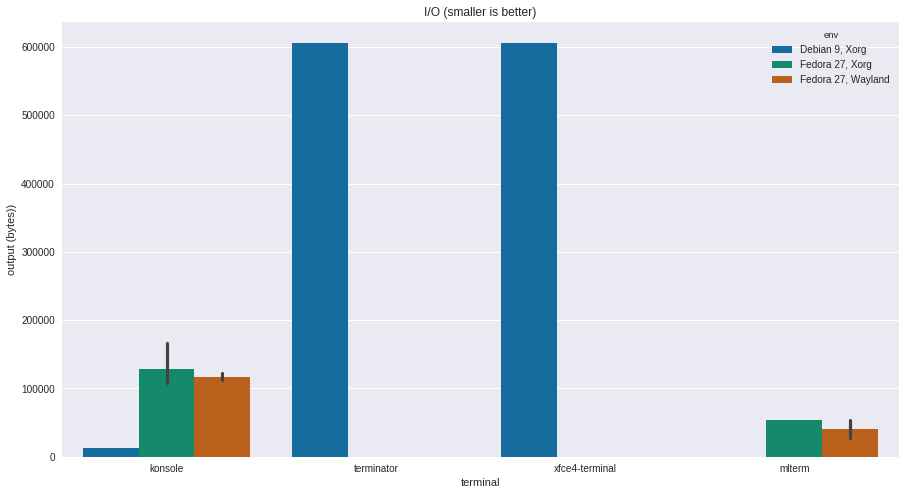

In [12]:
fig = setup_fig()

# some terminals still write minimal data, discard those that write less than 10kb
iodata = data[data.out_bytes > 10*1024]

ax = sns.barplot(data=iodata, x='terminal', y='out_bytes', palette='colorblind', hue='env')
ax.set_title('I/O (smaller is better)')
ax.set_ylabel('output (bytes))')